In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_scores = pd.read_excel('/student_scores.xlsx')
df_scores.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
print(f"Jumlah data sebelum bersih: {len(df_scores)}")

Jumlah data sebelum bersih: 25


In [9]:
# Check Duplicated Data
print("Jumlah duplikat:", df_scores.duplicated().sum())
df_scores = df_scores.drop_duplicates()


Jumlah duplikat: 0


In [10]:
# Check Missing Value
print("Missing value per kolom:\n", df_scores.isnull().sum())

Missing value per kolom:
 Hours (x)     0
Scores (y)    0
dtype: int64


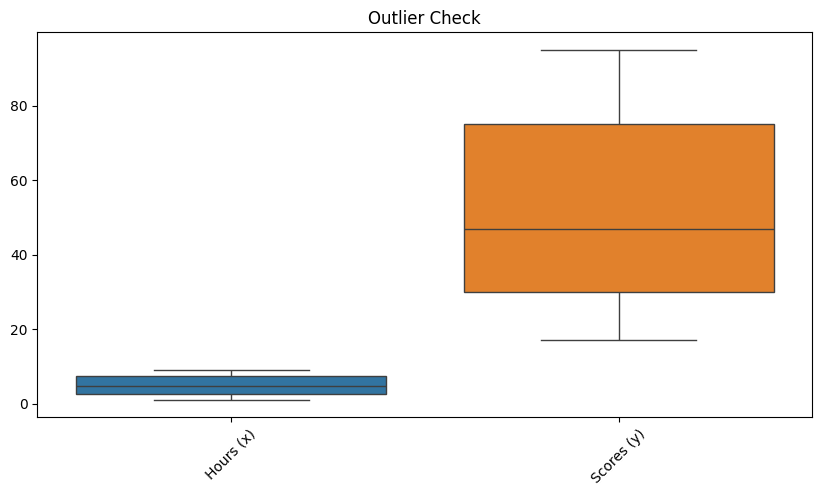

In [11]:
# Outlier Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_scores)
plt.title("Outlier Check")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Exploratory Data Analysis (EDA)
print(df_scores.describe())

       Hours (x)  Scores (y)
count  25.000000   25.000000
mean    5.012000   51.480000
std     2.525094   25.286887
min     1.100000   17.000000
25%     2.700000   30.000000
50%     4.800000   47.000000
75%     7.400000   75.000000
max     9.200000   95.000000


<Figure size 1000x600 with 0 Axes>

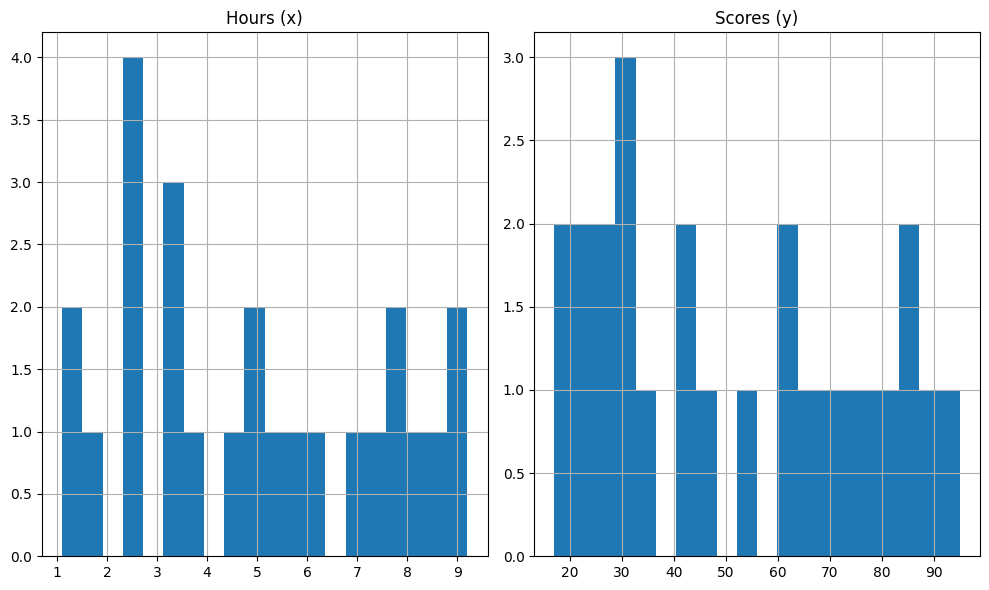

In [16]:
plt.figure(figsize=(10, 6))
df_scores.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

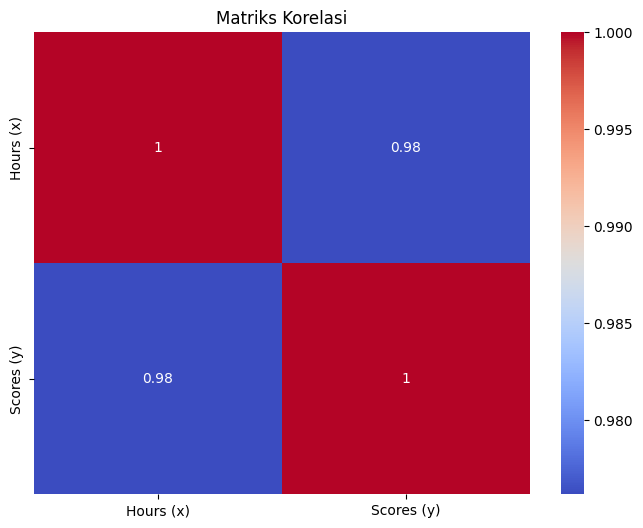

In [17]:
# Korelasi antar fitur
plt.figure(figsize=(8,6))
sns.heatmap(df_scores.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

In [25]:
# Feature dan Target
X = df_scores.drop(columns='Scores (y)')  # asumsi 'score' adalah target
y = df_scores['Scores (y)']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Modeling dengan 3 algoritma
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

                        MAE      RMSE        R2
Linear Regression  3.920751  4.352380  0.967806
Decision Tree      5.400000  5.630275  0.946125
Random Forest      2.778000  3.611808  0.977829


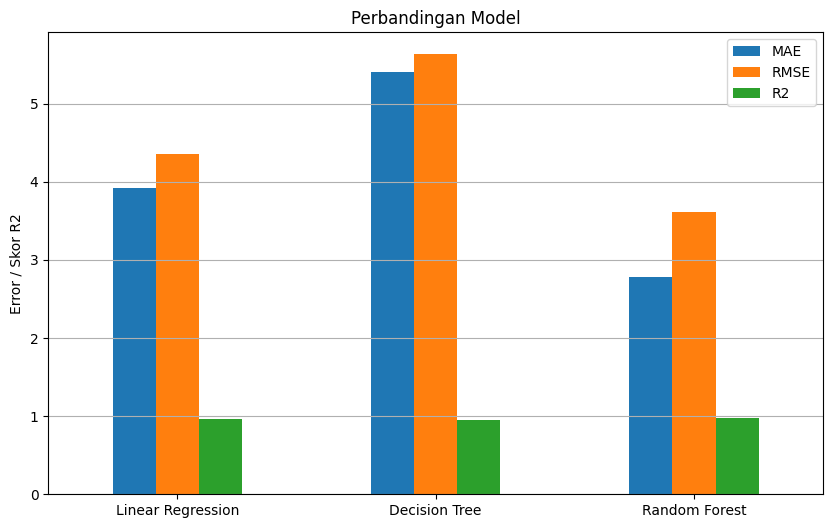

In [29]:
# Evaluasi hasil
hasil = pd.DataFrame(results).T
print(hasil)

# Visualisasi performa
hasil.plot(kind='bar', figsize=(10, 6))
plt.title("Perbandingan Model")
plt.ylabel("Error / Skor R2")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [30]:
# 8. Simpulan
print("\nModel dengan performa terbaik berdasarkan R2 Score:")
print(hasil['R2'].idxmax())



Model dengan performa terbaik berdasarkan R2 Score:
Random Forest
